# Problem Set 3, due February 5 at 5:30 pm

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print (bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

---

## Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

### 1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


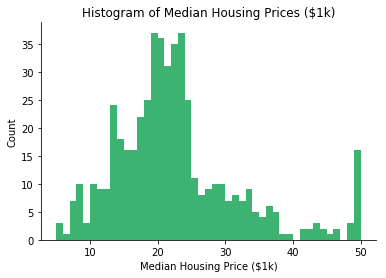

In [4]:
# prepare your jupyter notebook to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  



fig, ax = plt.subplots()
# edit the code below to make the graph look good
plt.hist(bdata.target,color="mediumseagreen",bins=np.arange(min(bdata.target), max(bdata.target) + 1,1)) #splits the binwidth to show every $1000 instead of every 10
plt.xlabel("Median Housing Price ($1k)")
plt.ylabel("Count")
plt.title("Histogram of Median Housing Prices ($1k)")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [5]:
data = pd.DataFrame(bdata.data)
data.columns=bdata.feature_names
data['TARGET']=bdata.target

print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  TARGET  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


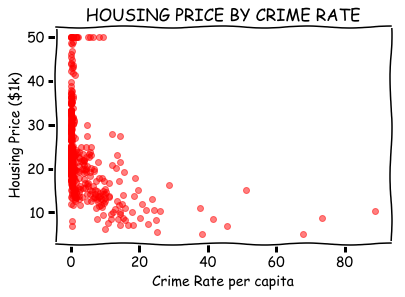

In [6]:
# enter your code below

with plt.xkcd():
    plt.scatter(data.CRIM, data.TARGET, alpha=0.5,color="red")
    plt.xlabel("Crime Rate per capita")
    plt.ylabel("Housing Price ($1k)")
    plt.title("HOUSING PRICE BY CRIME RATE")
    plt.show()

# seems like we can only really talk about the outliers here... If the crime rate is REALLY bad, house prices go down.
# But when there's little crime, other factors are at play affecting the housing price.

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

    RAD       NOX
0   1.0  0.462890
1   2.0  0.484917
2   3.0  0.452424
3   4.0  0.504311
4   5.0  0.570883
5   6.0  0.514846
6   7.0  0.441000
7   8.0  0.492500
8  24.0  0.672417


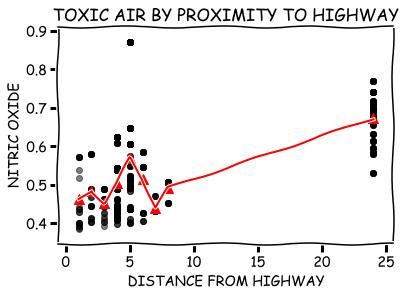

In [7]:
by_rad = pd.DataFrame(data.groupby(by=["RAD"],as_index=False)['NOX'].mean())
print(by_rad)
with plt.xkcd():
    plt.scatter(data.RAD, data.NOX, alpha=0.5,color="black")
    plt.xlabel("DISTANCE FROM HIGHWAY")
    plt.ylabel("NITRIC OXIDE")
    plt.title("TOXIC AIR BY PROXIMITY TO HIGHWAY")
    #now I'd like to get the mean of NOX along each value of Radius distance
    plt.scatter(by_rad.RAD,by_rad.NOX,alpha=1,marker="^",s=100,color="red")
    plt.plot(by_rad.RAD,by_rad.NOX,color="red")
    plt.show()
    

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [8]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
def compute_rmse(predictions, yvalues):
    rmse= np.sqrt(np.sum(((np.array(predictions)-np.array(yvalues))**2)/len(predictions)))
    
    return rmse
    
print(compute_rmse(np.array((2,2,3)),np.array((0,2,6))))



2.0816659994661326


### 2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [9]:
import random
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

# enter your code here
data['rand'] = data.apply(lambda row: random.random(), axis=1)
data.head()
data['train'] = (data['rand']>.33) 
bdata_train = pd.DataFrame(data[data['train']==True]) #2/3 of the data
bdata_test = pd.DataFrame(data[data['train']==False]) #1/3 of the data

len(bdata_test)
len(bdata_train)
bdata_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET,rand,train
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.090282,False
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,0.256927,False
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,0.084779,False
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0,0.281966,False
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7,0.051690,False


### 2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [10]:
# enter your code here

bad_model = bdata_train['TARGET'].mean() 
bdata_train['BAD'] = bad_model


bdata_test['BAD'] = bad_model #mean of TRAINING data




print(compute_rmse(bdata_train.BAD,bdata_train.TARGET)) # ON TRAINING
print(compute_rmse(bdata_test.BAD,bdata_test.TARGET)) 





9.266620768496358
9.05450291400697


*They're pretty close!*

---

## Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [11]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
import math
# two test vectors
x1=bdata_train.iloc[3][['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX','TARGET']]
x2=bdata_train.iloc[102][['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX','TARGET']]
print(x1,x2)
      
def distance(x1, x2, L):
    #when L == 1 we get the "taxicab norm"
    #when L == 2 we get the Euclidean norm
    # (sum of (the absolute values (of the x_i) to the power of L))to the 1/L
    
    dist =  np.sum([(np.absolute((a - b))**L)**(1/L) for a, b in zip(x1, x2)])
    return dist

distance((3,4),(6,8),2)


CRIM      0.06905
ZN              0
RM          7.147
AGE          54.2
DIS        6.0622
TAX           222
TARGET       36.2
Name: 4, dtype: object CRIM      2.33099
ZN              0
RM          5.186
AGE          93.8
DIS        1.5296
TAX           403
TARGET       17.8
Name: 148, dtype: object


7.0

### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [12]:
"""
# write your function specification here!
"""
import time
import operator


def nneighbor(training, testInstance, k, L,features):
    start_time = time.time()
    distances = [] #could be a Priority Queue 
    for x in range(len(training)):
        
        dist = distance(testInstance[features],training[features].iloc[x].to_frame(),L) #only find difference across two features
        distances.append([training.iloc[x].to_frame(),dist])
        
    #keep it sorted! could use a Priority Queue instead
    distances.sort(key=operator.itemgetter(1)) # we won't need the actual distance value. Just used for sorting
    neighbors = []
    # for k nearest neighbors
    for n in range(k):
        
        neighbors.append(pd.DataFrame(distances[n][0])) # the training set neighbors
    #print(neighbors)
    


    #print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return neighbors
    #return rmse
def get_prediction(neighbors,testInstance):
    #now we have the neighbors, let's make a prediction by taking the average of their TARGETs
    predicted_series = [x.loc['TARGET'].tolist() for x in neighbors]
    predicted = sum([item for sublist in predicted_series for item in sublist])/len(neighbors)
    
    
    #after we have the predicted value, we can compare it to our test data and see how we did!
    true = testInstance['TARGET']
    return predicted

#evaluate our model!
# remember x2 is a test vector I grabbed from bdata_test, defined above
k=23
neighbors = nneighbor(bdata_train,x2,k,2,['CRIM','RM'])
prediction = get_prediction(neighbors,x2)
print(prediction,x2['TARGET']) #just on one test instance

def compare_test(training,testing,k,L,features):
    #here's the arrays we will compare! #we will eventually zip them
    predictions = []
    real_targets = []
    #we have a training set and a testing set. We will find the neighbors in the training, take an average, and assign that for the testing.
    # we can then compare that predicted value to the actual test value. And compute the rmse.
    for instance in range(0,len(testing)):
        #print(instance)
        #go through each test instance
        
        #get its neighbors based on the features
        neighbors = nneighbor(training, testing.iloc[instance], k, L, features)
        prediction = get_prediction(neighbors,testing.iloc[instance])
        predictions.append(prediction)
        real_targets.append(testing.iloc[instance]['TARGET'])
        #print(prediction, testing.iloc[instance]['TARGET'])
    
    rmse = compute_rmse(predictions,real_targets)
    #print(rmse)
    return rmse
    
print(compare_test(bdata_train,bdata_test,k,2,['CRIM','RM']))
    
# the RMSE is hovering around 9-9.5 for unnormalized data with these features   
        
        
        
        
    




19.182608695652178 17.8
9.39974819506806


### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [13]:
"""
Function
--------
normalize

Given an array, return the normalized version of that array

Parameters
----------
raw_data : array
    Array of numerical values 


Returns
-------
normalized_data : array
    Array of normalized values ((x - mean) / standard deviation) for all x in raw_data

Example
-------
>>> print (normalize([10,2,3,4,9,12,8,13,20]))
[0.1867718419094071, -1.3074028933658497, -1.1206310514564426, -0.9338592095470355, 0.0, 0.5603155257282213, -0.1867718419094071, 0.7470873676376284, 2.0544902610034783]

"""
def normalize(raw_data):
    #for each of the columns, subtract the mean and divide by standard deviation
    #raw_data is an array
    mean = np.mean(raw_data)
    std = np.std(raw_data)
    normalized_data = [((x-mean)/std) for x in raw_data]
    
    
    return normalized_data

# now I need to normalize my actual data!
# remember the columns I want to normalize:
norm_train = pd.DataFrame()
norm_test = pd.DataFrame()
for column in bdata_train[['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX','TARGET']]:
    
    norm_train[column]=normalize(bdata_train[column])
    norm_test[column]=normalize(bdata_test[column])

    
print(norm_train.head())
print(norm_test.head())

testInst = norm_test.iloc[13][['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX','TARGET']]
print(testInst)
k=25

neighbors = nneighbor(norm_train,testInst,k,2,['CRIM','RM'])
predicted = get_prediction(neighbors,testInst)
print(predicted, testInst['TARGET']) #this is for one test instance


    






       CRIM        ZN        RM       AGE       DIS       TAX    TARGET
0 -0.400941  0.216513  0.401484 -0.087525  0.107179 -0.646593  0.113088
1 -0.398445 -0.506969  0.183505  0.385709  0.509946 -0.971295 -0.145906
2 -0.397843 -0.506969  1.000220 -0.757653  1.012819 -1.091555  1.127481
3 -0.393481 -0.506969  1.211122 -0.467494  1.012819 -1.091555  1.429641
4 -0.391193 -0.004551 -0.395414 -0.039165  0.782437 -0.556398 -0.005618
       CRIM        ZN        RM       AGE       DIS       TAX    TARGET
0 -0.449007 -0.453337  1.320481 -0.350271  0.670158 -1.021804  1.453157
1 -0.448720 -0.453337  0.229870 -0.441669  1.235501 -1.138002  0.783803
2 -0.435873  0.190299 -0.142816  0.982629  1.177836 -0.620922  0.605309
3 -0.426875  0.190299  0.153310  0.914080  1.382374 -0.620922 -0.744556
4 -0.441560  0.190299 -0.551615 -1.191902  0.919919 -0.620922  0.002890
CRIM     -0.444876
ZN       -0.453337
RM       -0.488056
AGE      -0.079882
DIS      -0.159349
TAX      -0.806839
TARGET   -0.309476
Nam

In [14]:
print(compare_test(norm_train,norm_test,k,2,['CRIM','RM']))


1.0539283625178484


*To be honest, I started playing around with k even though we are going to use cross-validation to do that! It was kind of cool to try to fiddle with it manually, because then we get the real appreciation for machine learning and cross-validation and "automatic" parameter tuning. Some values of k are really not right!*

### 3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [15]:
k=25
print(compare_test(norm_train,norm_test,k,2,['CRIM','AGE','TAX']))




1.0539283625178484


In [17]:
k=1
print(compare_test(norm_train,norm_test,k,2,['AGE','DIS','TAX','ZN']))

0.9542784137948738


In [18]:
k=1
print(compare_test(norm_train,norm_test,k,2,['CRIM','AGE','DIS','TAX','ZN','RM']))

1.0299546541289633


*It's actually really difficult to say much about the rmse because the normalized data has a small range. I'm finding it difficult to even assess my model. It's hard to say what the error even means. Also, this seems to be taking ages! For every single test instance, we go through the entire dataset. It's a huge pain.*

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [19]:
# enter your code here
def fold(data,K):
    shuffled = data.sample(frac=1) #should shuffle everything
    FOLDS = []
    #print(shuffled)
    count = 0
    length = len(data['TARGET'])//K #integer divide
    #print(length)
    for i in range(0,K):
        temp_fold = []
        while len(temp_fold) < length:
            temp_fold.append(shuffled.iloc[count])
            count+=1
        FOLDS.append(temp_fold)
    
    
    return FOLDS


folds = fold(norm_train,10) #fold the data into K chunks


# for each of the chunks, use the K-1 as "training" data and the remaining one as the test data.
# grab randomly from the folds, and compare to the rest of the fold. 
# compute the rmse.
# save the rmse.
# take average of rmses for all folds.il

### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [20]:
"""
Function
--------
knn

knn takes in some data, the features you care about, an L value (for distance), and a K (the number of neighbors you want to look at)


Parameters
----------
data : pandas dataframe
    Dataframe, including TARGET

features: array of strings; the features you want to use in the model

L: int
    used in the distance metric
    
k: int
    number of neighbors you want to include in nearest neighbors "vote"
    
K: int
    number of folds for cross validation


Returns
-------
rmse : float
    this is the error of your model; basically how well it is doing. You want to MINIMIZE this by tweaking parameters, while also performing well on new data

Example
-------
>>> knn(data,['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX'],2,3)


"""
def knn(data, features,k, L, K):
    #print(features)
    rmse = 0 #should seriously never be 0
    count = 0
    # knn should take in some data, features to look at, L (for distance specification) and k
    #split the data into K folds (apparently it's better to normalize WITHIN the CV than before, but that it shouldn't really matter?)
    #must normalize the data
    norm_data = pd.DataFrame()
    for column in features:
        norm_data[column]=normalize(data[column])
    norm_data['TARGET'] = normalize(data['TARGET'])
    #print(norm_data)
    
    #split the data into K folds
    folds = fold(norm_data,K)
   
    #for each of the folds, grab one and use it as test data on the rest
    for f in range(len(folds)):
        
        test_data = folds.pop()
        #do your neighbors magic
        
        #we need to transform the folds into a format that makes sense for the compare_test function
        test_data_df = pd.DataFrame(test_data)
        folds_df = pd.DataFrame(folds[0])
        for sublist in range(1,len(folds)):
            folds_df.append(folds[sublist])   
            
        #should be dataframes
        #print(type(folds_df))
        #print(type(test_data))
        
        temp_rmse = compare_test(folds_df,test_data_df,k,L,features)
        rmse+=temp_rmse
        count+=1
        
        
        #remember to add it back in! we are adding back to the end, so hopefully that works out
        folds.append(test_data)

        rmse = rmse/count
    
        
        
              
    
    return rmse

bdata = load_boston()
data = pd.DataFrame(bdata.data)
data.columns=bdata.feature_names
data['TARGET']=bdata.target

rmse_4_model = knn(data,['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX'],3,2,10)
print(rmse_4_model)


0.12702093879629373


### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [21]:
#check all these vals of k and find the best one
rmses_list = []
current_rmse = 100000
best_k = 0
for k in range(1,25):
    temp_rmse_4_k = knn(data,['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX'],k,2,10)
    print(temp_rmse_4_k)
    rmses_list.append(temp_rmse_4_k)
    #find best
    if temp_rmse_4_k < current_rmse:
        current_rmse = temp_rmse_4_k
        best_k = k
print(current_rmse,best_k)

     

0.09230241034538579 9


* If I did this correctly, different k values should result in different rmse values. There should be an "optimal k", meaning that there is a value of k that yields the smallest error. It is probably "somewhere in the middle", meaning that grabbing 1 k will probably overfit, while grabbing too many k will underfit. My code seems to be taking ages. Much apologies.

* My best k on this run was 9, with an RMSE of .0923

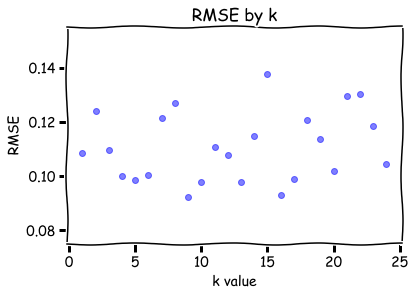

In [22]:
# enter your code below
krange = np.arange(1,25)
with plt.xkcd():
    plt.scatter(krange, rmses_list, alpha=0.5,color="blue")
    plt.xlabel("k value")
    plt.ylabel("RMSE")
    plt.title("RMSE by k")
    plt.show()

# instead of having any pattern to it, it just looks dumb. Looks like values of 9 and maybe 16 gave the least error.